# Digit Recognition Model for MNIST Dataset

<img src= "https://aigeekprogrammer.com/wp-content/uploads/2019/08/Handwriting-digit-recognition-Keras-MNIST.jpg"/>

## MNIST dataset:
MNIST is a collection of handwritten digits from 0-9. Image of size 28 X 28

## Introduction
MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels.

## Importing Data and Modules

In [19]:
import keras

# importing MNIST image data from Keras
from keras.datasets import mnist

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

# data processing
import pandas as pd
import numpy as np

import random

In [20]:
#Splitting the dataset into Train and Test data
digits = mnist.load_data()

#Unpacking 
(X_train, Y_train), (X_test, Y_test) = digits

In [21]:
# shape of the Data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


The Keras MINST data 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

In [22]:
#  Checking Data Distribution for Target Variable
unique, counts = np.unique(Y_train, return_counts=True)
print( np.asarray((unique, counts)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


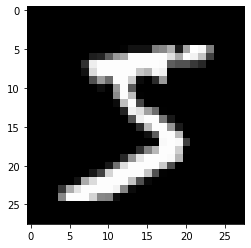

5


In [23]:
# looking at the data 
#First Record
plt.imshow(X_train[0], cmap = 'gray')
plt.show()
print(Y_train[0])

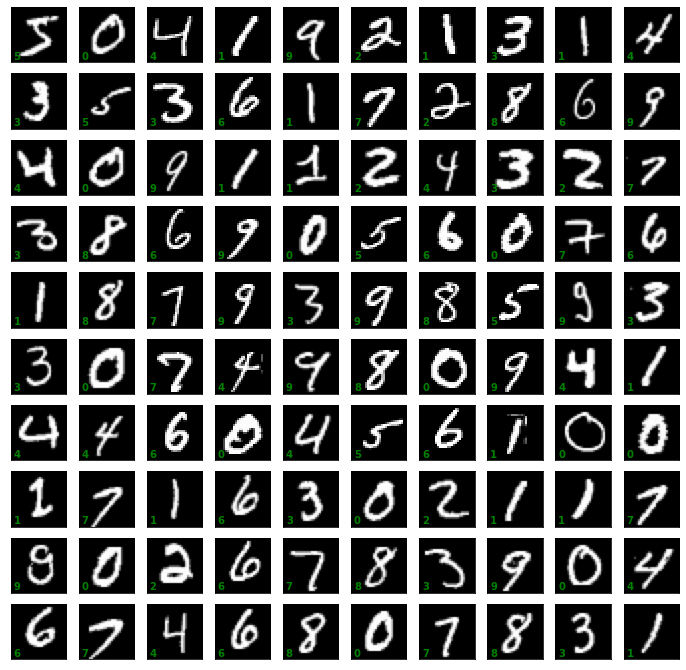

In [24]:
# Vizualizaing top 100 records
fig, axes = plt.subplots(10, 10, figsize=(12, 12), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap = 'gray')
    ax.text(0.05, 0.05, str(Y_train[i]), color='green', 
            weight='semibold', transform=ax.transAxes)

## Normalizing the Data

In [25]:
# Normalizing the data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

Tried running the model without normalization and it does a significant effect if we don't.

In [ ]:
def init_seeds(s):
    tf.random.set_seed(s)
    np.random.seed(s)
    random.seed(s)

# initialize seeds
init_seeds(314)

## Sequential Model

In [ ]:
model = tf.keras.models.Sequential()
#Sequential model is a feed forward model.

# Now adding layers to nn model

################
# INPUT LAYER  # 
################

# we need to flatten the input layer because our data is array of 28x28.
model.add(tf.keras.layers.Flatten())  
model.add(tf.keras.layers.Dense(128, activation = tf.nn.sigmoid))  
# 128 = no. of neurons 
# activation - what funtion activates the neuron (sigmoid / relu - rectified linear etc)

################
# HIDDEN LAYER #
################

#  Dense layer:  it's a densely-connected layer,
#  meaning each node connects to each prior and subsequent node. 
model.add(tf.keras.layers.Dense(128, activation = tf.nn.sigmoid))

################
# OUTPUT LAYER #
################

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) 
# nodes = 10, 1 node per possible number prediction.
# activation: In this case we use 'softmax' because we need a function that can give us possible 
# probability prediction of out outputs.

####################
# Compiling Model  #
####################

model.compile(optimizer = 'adam' , loss= 'categorical_crossentropy', metrics = 'accuracy')  
# optimizer:  
# loss: nn doesn't try to improve accuracy, it always try to minimize loss
# sparse_categorical_crossentropy

###############
# Train Model #
###############

model.fit(X_train, Y_train, epochs = 10)

#### Check the model accuracy on the test sample

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size=1)

print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

We tried multiple combination of activation fumction (relu,sigmoid) and optimizer(adam, sgd) , with and without normalizing data.       

- Results on Test Data (with Normalization):

|Combination|Loss|Accuracy|					
|---|---|---|
|sigmoid & sgd  |58.36%|84.38%|	
|<font color='green'>sigmoid  & adam</font>|<font color='green'>9.27%</font>|<font color='green'>97.23%</font>|
|relu & sgd     |18.19%|94.60%|
|relu  & adam   |12.15%|97.10%|

- Results on Test Data (without Normalization)

|Combination|Loss|Accuracy|					
|---|---|---|
|sigmoid & sgd|23.01%|93.34%|
|sigmoid  & adam|21.91%|93.12%|
|relu & sgd|235.17%|11.35%|
|relu  & adam|17.79%|96.36%|

It is clear from the above results that we need activation = sigmoid and optimizer = adam and normalizie data in order to minimize the loss and have higher accuracy.

## Save the Model

In [ ]:
outputfile= 'D:/D_ST/Git_Profile/MNIST digits classification/MNIST_Model_OUTPUT.model'
model.save(outputfile)

## Load The Model

In [ ]:
from tensorflow.keras.models import load_model
final_model = load_model(outputfile)
final_model.summary()
final_model.optimizer

In [ ]:
predictions = final_model.predict(X_test)
predictions

Let's check Actual Value and Predicted Value for our test data set

In [ ]:
# Original Values
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [ ]:
# Predicted Value
print(np.argmax(predictions[0]))

## Vizualizing the Predictions

In [ ]:
preds_raw = model.predict(X_test)

# grab the predicted digit (based on the highest probability) for the entire dataset
preds = [np.argmax(pred) for pred in model.predict(X_test)]

# view the first ten predictions
preds[:10]

In [ ]:
# Visualizing for first 100 values
fig, axes = plt.subplots(10, 10, figsize=(7, 7), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='gray', interpolation='bicubic')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = Y_test[i]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='green',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();

We can observe that our model has predicted ONE value wrong for the first 100 images

## Image Classification Model using CNN

In [ ]:
# initialize seeds
init_seeds(314)

cnn = Sequential(
    [
        tf.keras.layers.Conv2D(filters=28, 
            kernel_size=(4, 4), 
            activation='relu', 
            input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(10, activation='softmax')
    ], 
    name='cnn')

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

cnn.fit(X_train, Y_train, epochs=10, shuffle=True);

In [ ]:
loss, accuracy = cnn.evaluate(X_test, Y_test, batch_size=1)

print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

Tried Multiple combinations pf parameters:

1.    
           
tf.keras.layers.Conv2D(filters=28, 

kernel_size=(3, 3), 

activation='relu', 

input_shape=(28, 28, 1)),

tf.keras.layers.MaxPooling2D((2, 2)),

tf.keras.layers.Flatten(),

Dense(128, activation='relu'),

Dense(64, activation='relu'),

Dense(10, activation='softmax')

<font color='green'>Loss: 8.83%, Accuracy: 98.26%</font>

2. 
              
tf.keras.layers.Conv2D(filters=28, 

kernel_size=(4, 4), 

activation='relu', 

input_shape=(28, 28, 1)),

tf.keras.layers.MaxPooling2D((3, 3)),

tf.keras.layers.Flatten(),

Dense(128, activation='relu'),

Dense(64, activation='relu'),

Dense(10, activation='softmax')

<font color='green'>Loss: 5.63%, Accuracy: 98.64%</font>

3. 

tf.keras.layers.Conv2D(filters=28, 

kernel_size=(4, 4), 

activation='sigmoid', 

input_shape=(28, 28, 1)),

tf.keras.layers.MaxPooling2D((3, 3)),

tf.keras.layers.Flatten(),

Dense(128, activation='sigmoid'),

Dense(64, activation='sigmoid'),

Dense(10, activation='softmax')

<font color='green'>Loss: 7.06%, Accuracy: 97.63%</font>

4.      
     
tf.keras.layers.Conv2D(filters=28, 

kernel_size=(6, 6), 

activation='relu', 

input_shape=(28, 28, 1)),

tf.keras.layers.MaxPooling2D((3, 3)),

tf.keras.layers.Flatten(),

Dense(128, activation='relu'),

Dense(64, activation='relu'),

Dense(10, activation='relu')

<font color='red'>Loss: 230.27%, Accuracy: 9.80%</font>


We were able to achieve the highest accuracy and lowest loss when we used '2' Combination of parameters.

Loss: 5.63%, Accuracy: 98.64%


In [ ]:
# Visualizing for first 100 values

preds_raw = cnn.predict(X_test)

# grab the predicted digit (based on the highest probability) for the entire dataset
preds = [np.argmax(pred) for pred in cnn.predict(X_test)]

# Visualizinf forat 100 values
fig, axes = plt.subplots(10, 10, figsize=(7, 7), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='gray', interpolation='bicubic')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = Y_test[i]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='green',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();

## Conclusion:

We tried different parameter combinations for two models, i.e; MLP and CNN

**MLP:** Loss: 9.27%, Accuracy: 97.23%

**CNN:** Loss: 5.63%, Accuracy: 98.64%